#                                     CS210 Individual Project

#### In this project, we have collected a data which incudes taxi trips made in two weeks on New York City. We explored and analyzed our data and then tried to understand whether there is relation between the passenger group size on the time of day. Furthermore, we queried whether the trip duration increases on the weekends.    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [2]:
from os.path import join
import reverse_geocoder as rg

In [3]:
d_path = r"C:\Users\Efe Şencan\Downloads"
d_file = "taxi-trips.csv"


In [4]:
df = pd.read_csv(join(d_path, d_file))

##### Top 5 data from our datasets  

In [5]:
df.head()
                                   #df[0:1]["vendor_id"][0] reaching a spesific element in DataFrame

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


## Description of the Datas

In [6]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


## Number of rows and columns (Our Shape)

In [7]:
n_rows, n_columns = df.shape  # get the shape of dataframe
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 118185, number of columns: 11


## Data Types in our Dataset

In [8]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [9]:
x = df["pickup_latitude"]
y = df["pickup_longitude"]
c = list(zip(x,y))
results = rg.search(c)
district = []

x2 = df["dropoff_latitude"]
y2 = df["dropoff_longitude"]
c2 = list(zip(x2,y2))
second_results = rg.search(c2)
second_district = []

for x in range(len(results)):
    district.append(results[x]["name"])
    second_district.append(second_results[x]["name"])
df.insert(7,"Pickup District",district)
df.insert(10,"Dropoff District",second_district)



Loading formatted geocoded file...


In [10]:
df.head(118000)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,Pickup District,dropoff_longitude,dropoff_latitude,Dropoff District,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,Manhattan,-73.964630,40.765602,Manhattan,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,Long Island City,-73.973000,40.789989,Manhattan,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,Weehawken,-73.978500,40.756191,Manhattan,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,Manhattan,-73.953201,40.765068,Long Island City,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,New York City,-73.998993,40.722710,New York City,N,695
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,Hoboken,-73.979446,40.718750,New York City,N,1561
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,Manhattan,-74.005112,40.751492,Weehawken,N,1356
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,Manhattan,-73.971809,40.757889,Manhattan,N,736
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,New York City,-73.989410,40.730148,New York City,N,972
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,Long Island City,-73.910530,40.709492,East New York,N,755


## Top 5 Pickup Districts

In [11]:
df["Pickup District"].value_counts()[0:5]

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: Pickup District, dtype: int64

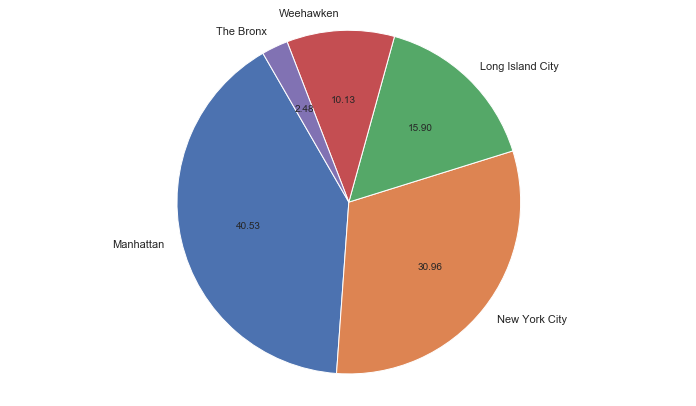

In [38]:

labels = 'Manhattan', 'New York City', 'Long Island City', 'Weehawken',"The Bronx"
sizes = [45329, 34625, 17787, 11334, 2777]
explode = (0, 0, 0, 0,0)  

plt.pie(sizes, explode=explode, labels=labels, autopct='%.2f',
        shadow=False, startangle=120)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rcParams["figure.figsize"] = [12,7]
plt.show()

## Top 5 Dropoff Districts

In [13]:
df["Dropoff District"].value_counts()[0:5]

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: Dropoff District, dtype: int64

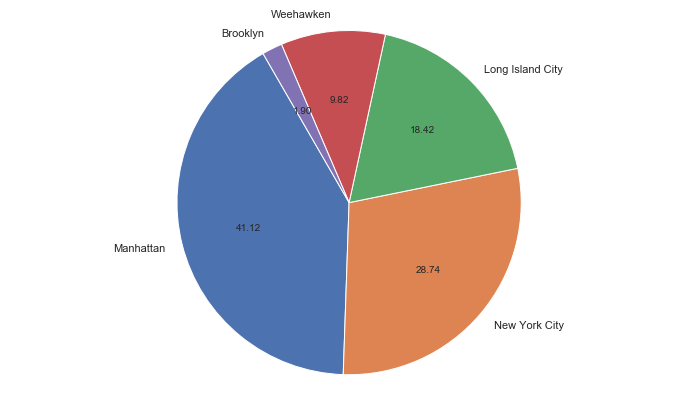

In [39]:
labels = 'Manhattan', 'New York City', 'Long Island City', 'Weehawken',"Brooklyn"
sizes = [44478, 31082, 19919, 10621, 2059]
explode = (0, 0, 0, 0,0)  # only "explode" the 2nd slice

plt.pie(sizes, explode=explode, labels=labels, autopct='%.2f',
        shadow=False, startangle=120)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rcParams["figure.figsize"] = [12,7]
plt.show()

## Top 5 Pickup - Dropoff District Pairs

In [15]:
df.groupby(["Pickup District","Dropoff District"]).size().sort_values(ascending = False)[0:5]

Pickup District  Dropoff District
Manhattan        Manhattan           26746
New York City    New York City       16660
Manhattan        Long Island City     6070
New York City    Manhattan            5802
                 Long Island City     5633
dtype: int64

In [16]:
from geopy.distance import geodesic

## Table with the Distance Values

In [17]:
distance_list = []
for i in range(len(c)):
    distance_list.append(geodesic(c[i],c2[i]).miles)
    
df.insert(11,"Distance",distance_list)
df.head(118000)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,Pickup District,dropoff_longitude,dropoff_latitude,Dropoff District,Distance,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,Manhattan,-73.964630,40.765602,Manhattan,0.933406,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,Long Island City,-73.973000,40.789989,Manhattan,3.178194,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,Weehawken,-73.978500,40.756191,Manhattan,0.928961,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,Manhattan,-73.953201,40.765068,Long Island City,1.228003,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,New York City,-73.998993,40.722710,New York City,1.562103,N,695
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,Hoboken,-73.979446,40.718750,New York City,2.486098,N,1561
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,Manhattan,-74.005112,40.751492,Weehawken,2.648687,N,1356
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,Manhattan,-73.971809,40.757889,Manhattan,0.452659,N,736
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,New York City,-73.989410,40.730148,New York City,1.372636,N,972
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,Long Island City,-73.910530,40.709492,East New York,1.809375,N,755


In [18]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])
dates = df[df.columns[2]]

column = []
mor_start = datetime(2016,3,14,7,0,0)
mor_end = datetime(2016,3,14,9,0,0)
after_end = datetime(2016,3,14,16,0,0)
rush_evening_end = datetime(2016,3,14,18,0,0)
evening_end = datetime(2016,3,14,23,0,0)

for j in range(len(dates)):
    
    if(mor_start.time() <= dates[j].time() < mor_end.time()):
        column.append("rush hour morning")
    elif(mor_end.time() <= dates[j].time() < after_end.time()):
        column.append("afternoon")
    elif(after_end.time() <= dates[j].time() < rush_evening_end.time()):
        column.append("rush hour evening")
    elif(rush_evening_end.time() <= dates[j].time() < evening_end.time()):
        column.append("evening")
    else:
        column.append("late night")

df.insert(3,"time of day",column)
    





## DataFrame with the Date Catagories

In [19]:

df.head(110630)

,id,vendor_id,pickup_datetime,time of day,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,Pickup District,dropoff_longitude,dropoff_latitude,Dropoff District,Distance,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,rush hour evening,2016-03-14 17:32:30,1,-73.982155,40.767937,Manhattan,-73.964630,40.765602,Manhattan,0.933406,N,455
1,id0012891,2,2016-03-10 21:45:01,evening,2016-03-10 22:05:26,1,-73.981049,40.744339,Long Island City,-73.973000,40.789989,Manhattan,3.178194,N,1225
2,id3361153,1,2016-03-11 07:11:23,rush hour morning,2016-03-11 07:20:09,1,-73.994560,40.750526,Weehawken,-73.978500,40.756191,Manhattan,0.928961,N,526
3,id2129090,1,2016-03-14 14:05:39,afternoon,2016-03-14 14:28:05,1,-73.975090,40.758766,Manhattan,-73.953201,40.765068,Long Island City,1.228003,N,1346
4,id0256505,1,2016-03-14 15:04:38,afternoon,2016-03-14 15:16:13,1,-73.994484,40.745087,New York City,-73.998993,40.722710,New York City,1.562103,N,695
5,id0970832,1,2016-03-12 20:39:39,evening,2016-03-12 21:05:40,1,-74.008247,40.747353,Hoboken,-73.979446,40.718750,New York City,2.486098,N,1561
6,id2049424,2,2016-03-02 20:15:07,evening,2016-03-02 20:37:43,1,-73.963890,40.773651,Manhattan,-74.005112,40.751492,Weehawken,2.648687,N,1356
7,id0038484,2,2016-03-09 13:41:11,afternoon,2016-03-09 13:53:27,2,-73.972855,40.764400,Manhattan,-73.971809,40.757889,Manhattan,0.452659,N,736
8,id3092788,2,2016-03-03 22:01:32,evening,2016-03-03 22:17:44,2,-73.984772,40.710571,New York City,-73.989410,40.730148,New York City,1.372636,N,972
9,id3863815,2,2016-03-14 04:24:36,late night,2016-03-14 04:37:11,3,-73.944359,40.714489,Long Island City,-73.910530,40.709492,East New York,1.809375,N,755


In [20]:
distance = [0,0,0,0,0]
seconds = [0,0,0,0,0]
counts = [0,0,0,0,0]
distance_time = []
trip_duration_time = []
for i in range(len(c)):
    if(column[i] == "rush hour morning"):
        counts[0] += 1
        seconds[0] += df["trip_duration"][i]
        distance[0] += distance_list[i]
    elif(column[i] == "afternoon"):
        counts[1] += 1
        seconds[1] += df["trip_duration"][i]
        distance[1] += distance_list[i]
    elif(column[i] == "rush hour evening"):
        counts[2] += 1
        seconds[2] += df["trip_duration"][i]
        distance[2] += distance_list[i]
    elif(column[i] == "evening"):
        counts[3] += 1
        seconds[3] += df["trip_duration"][i]
        distance[3] += distance_list[i]
    elif(column[i] == "late night"):
        counts[4] += 1
        seconds[4] += df["trip_duration"][i]
        distance[4] += distance_list[i]

for i in range(5):
    distance_time.append(distance[i]/counts[i])
    trip_duration_time.append(seconds[i]/counts[i])



[1.9438227679611428, 1.932455626387764, 2.0771284877356244, 2.0990763932796432, 2.5585796811566026]


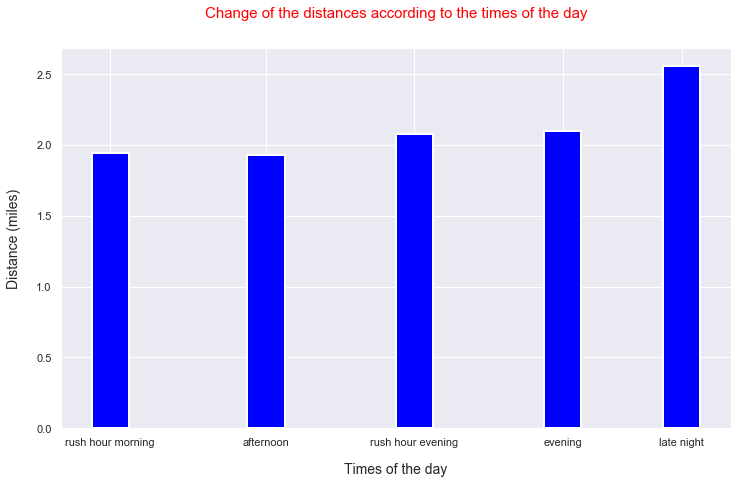

In [53]:
#print(distance_time)
from matplotlib import rcParams
rcParams['axes.titlepad'] = 30

times = ["rush hour morning","afternoon", "rush hour evening","evening","late night"]


plt.xlabel("Times of the day",fontsize = 14,labelpad = 15)
plt.ylabel("Distance (miles)",fontsize = 14,labelpad=15)
plt.title("Change of the distances according to the times of the day", fontsize = 15,color = "red")


y_pos = [1,22,42,62,78]
 
# Create bars
plt.bar(y_pos, distance_time, color='blue', linewidth = 2,width = 5)
 
# Create names on the x-axis
plt.xticks(y_pos, times)
plt.rcParams["figure.figsize"] = [12,7]


plt.show()

##### The graph shows that, people at New York who use Taxi, covers the distance most at the late night. Besides that, there is a an increase of the distance from rush our evening to the late night. When we compare the distance covered on rush our morning and the afteroon, we observe that people tend to travel more on the rush hour morning.  

In [54]:
#print(trip_duration_time)

[918.4887158766138, 963.9227460253572, 1024.4945520581114, 893.5953287492187, 866.0954570791528]


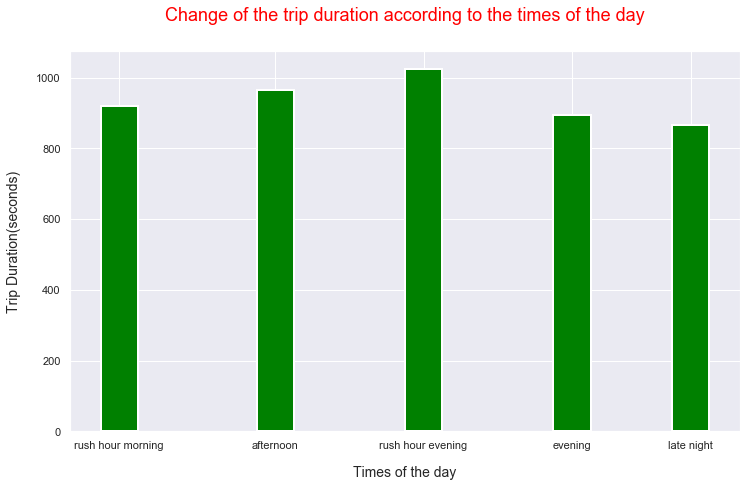

In [46]:
plt.xlabel("Times of the day",fontsize = 14,labelpad = 15)
plt.ylabel("Trip Duration(seconds)",fontsize = 14,labelpad = 15)
plt.title("Change of the trip duration according to the times of the day", fontsize = 18, color = "red")
 
# Create bars
plt.bar(y_pos, trip_duration_time, color='green', linewidth = 2,width = 5)
 
# Create names on the x-axis
plt.xticks(y_pos, times)
plt.rcParams["figure.figsize"] = [16,9]


plt.show()

#### According to our graph, the trip duration of the people who use taxi in New York, is most on the rush hour evening. On the other hand, the trip duration is less on the late night. The reason for that could be, the traffic is lesser at the late night, thus people can reach from one place to another more quickly although the average distance they cover is more at the late night on the average.   

In [24]:
"""labels=[str(x) for x in range(7)]
print(labels)
plt.ylim(0, 1.5)
plt.xlim(-2,10)
for i in range(7):
    sns.distplot(df[df['passenger_count'] == i]['Distance'],label=str(i))
plt.legend()"""

"labels=[str(x) for x in range(7)]\nprint(labels)\nplt.ylim(0, 1.5)\nplt.xlim(-2,10)\nfor i in range(7):\n    sns.distplot(df[df['passenger_count'] == i]['Distance'],label=str(i))\nplt.legend()"

# Hypothesis Testing

#### We are trying to identify whether passenger group size has an affect on the distance.
#### Our Null Hypothesis:  Passenger group size has no effect on the distance.

#### We also would like to test whether trip distance increases at the weekends.
#### Our null Hypothesis: The day of the week has no effect on the distance.

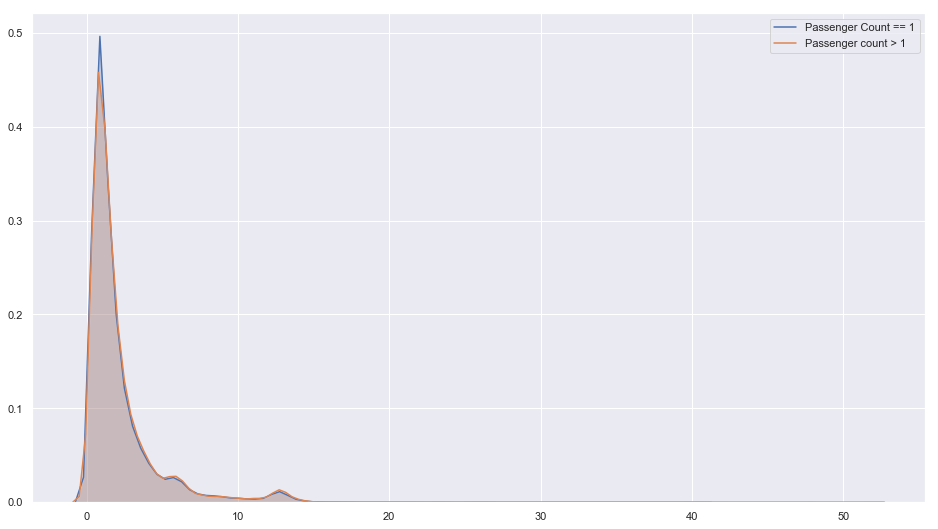

In [25]:


past_df = df[df["passenger_count"] == 1]
gs_df = df[df["passenger_count"] != 1]

ax = sns.kdeplot(past_df["Distance"].rename("Passenger Count == 1"), shade=True)
sns.kdeplot(gs_df["Distance"].rename("Passenger count > 1"), ax=ax, shade=True)
plt.show()

past_values = past_df["Distance"].values
gs_era = gs_df["Distance"].values

In [26]:
_, p_value = stats.ttest_ind(a=past_values, b=gs_era, equal_var=False) # We used T test for that purpose
p_value

9.555133481574422e-07

##### Since our p value is less than 0.05, we reject the null hypotesis, which means that there is an effect of passenger group size on the distance covered. 

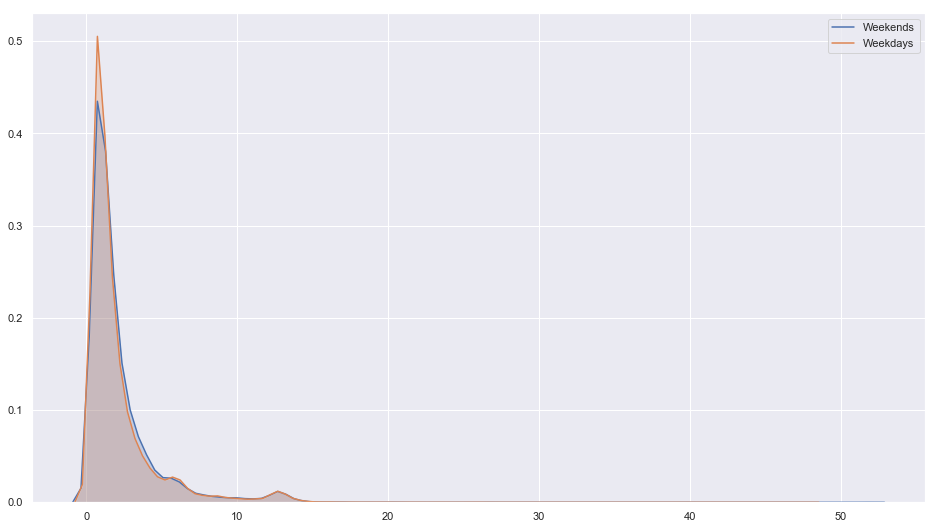

In [27]:

past_df = df[(df["pickup_datetime"].dt.dayofweek == 5) | (df["pickup_datetime"].dt.dayofweek == 6)]
gs_df = df[(df["pickup_datetime"].dt.dayofweek != 5) & (df["pickup_datetime"].dt.dayofweek != 6)]


ax = sns.kdeplot(past_df["Distance"].rename("Weekends"), shade=True)
sns.kdeplot(gs_df["Distance"].rename("Weekdays"), ax=ax, shade=True)
plt.show()

past_values = past_df["Distance"].values
gs_era = gs_df["Distance"].values



In [29]:
_, p_value = stats.ttest_ind(a=past_values, b=gs_era, equal_var=False) # We uses T test to calculate the p value.
p_value

2.0924144330682816e-08

#### Our p value is againless than 0.05, therefore we reject the second null hypothesis which means that the day of the week has an effect on the distance.